In [10]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

from tensorflow.keras.utils import image_dataset_from_directory
import cv2 as cv
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split as tts
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model


In [13]:
path ="/kaggle/input/hackthon/Orginal"
os.listdir(path)

['resume', 'email', 'scientific_publication']

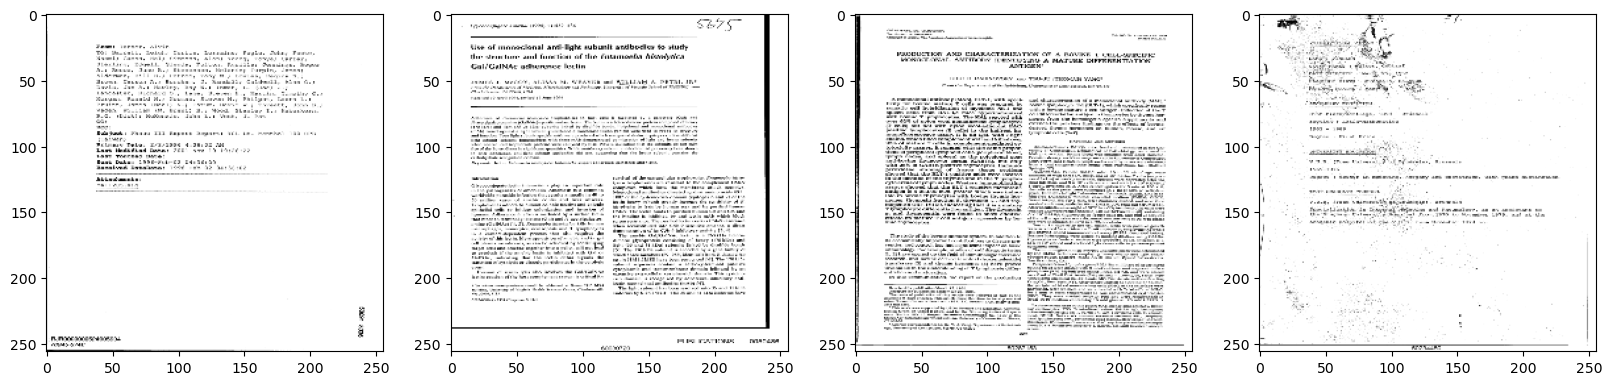

In [172]:

fig,ax = plt.subplots(ncols = 4, figsize = ((20,20)))
for idx, img in enumerate(data_batch[0][:4]):
    ax[idx].imshow(img.astype(int),cmap = "gray")
                      

In [216]:
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)
train_dir = '/kaggle/input/hackathon/Orginal - Train'
test_dir = '/kaggle/input/hackathon/Orginal - test'

In [217]:
train_generator = train_datagen.flow_from_directory(
                  train_dir,
                  target_size =(256, 256),  # target_size = input image size
                  batch_size = 20,
                  class_mode ='categorical')

Found 119 images belonging to 3 classes.


In [218]:
test_generator = test_datagen.flow_from_directory(
                    test_dir,
                    target_size =(256, 256),
                    batch_size = 20,
                    class_mode ='categorical')

Found 48 images belonging to 3 classes.


In [219]:
#creating a sequential model
#and adding layers to it

model = Sequential()
model.add(Conv2D(32,(3,3), 1, activation = 'relu', input_shape = (256,256,3)))
model.add(MaxPooling2D((2,2)))

model.add(Dropout(0.5))

model.add(Conv2D(64,(3,3), 1,activation = 'relu'))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(64,(3,3), 1,activation = 'relu'))

model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(64,activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))
model.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_48 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d_32 (MaxPoolin  (None, 127, 127, 32)     0         
 g2D)                                                            
                                                                 
 dropout_32 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 conv2d_49 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_50 (Conv2D)          (None, 60, 60, 64)      

In [221]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit_generator(
             train_generator,
             steps_per_epoch = 6,
             epochs = 10,
             validation_data = test_generator)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/10
6/6 [==============================] - 13s 2s/step - loss: 12.2583 - accuracy: 0.2521 - val_loss: 1.1149 - val_accuracy: 0.2083
Epoch 2/10
6/6 [==============================] - 12s 2s/step - loss: 1.0913 - accuracy: 0.3529 - val_loss: 1.1057 - val_accuracy: 0.3333
Epoch 3/10
6/6 [==============================] - 11s 2s/step - loss: 1.1582 - accuracy: 0.2437 - val_loss: 1.0664 - val_accuracy: 0.6458
Epoch 4/10
6/6 [==============================] - 12s 2s/step - loss: 1.0509 - accuracy: 0.3277 - val_loss: 0.9740 - val_accuracy: 0.3333
Epoch 5/10
6/6 [==============================] - 12s 2s/step - loss: 0.9268 - accuracy: 0.3950 - val_loss: 0.9325 - val_accuracy: 0.5000
Epoch 6/10
6/6 [==============================] - 12s 2s/step - loss: 0.7054 - accuracy: 0.7227 - val_loss: 0.7424 - val_accuracy: 0.5833
Epoch 7/10
6/6 [==============================] - 12s 2s/step - loss: 0.6451 - accuracy: 0.7227 - val_loss: 0.9257 - val_accuracy: 0.6250
Epoch 8/10
6/6 [=================

In [2]:
model.save("model.h5")

NameError: name 'model' is not defined